Please fill in your name and that of your teammate.

You: Albin

Teammate: Christoph Jutzet

# Introduction

Welcome to the second lab. I hope this environment is starting to look more familiar, and that you learned some of the shortcuts. At least try to use shortcuts to evaluate a cell, create a cell above or below the current, and switch between code and markdown, as these will radically improve your efficiency.  
Also, if you have not tried Latex in the previous assignment, give it a try in this one $y=mx+q$: a little practice goes a long way for when you will need to write more complex equations (e.g. exam).

Today's assignment is likely going to be a bit more time consuming than last week. And there is _a lot_ of Python. I suggest you focus on the harder parts in class so you can ask for clarification on any question you need. Also you may want to start a few days before the deadline just to be sure you have time to complete it (and ask any question you may need).

Last week we introduced three libraries: `numpy` does the main number crunching in Python; `matplotlib` is the foundation of most plotting; and `seaborn` wraps plotting with a convenient interface and eye-pleasing defaults.

Today we introduce **Scikit-learn**, another heavy-weight library in the field which provides basic (but high-quality) data analysis and ML tools.  
Head over to the home page of [Scikit-learn](https://scikit-learn.org/stable/): how many of the concepts are you already familiar with? Over the next week you will become confident in almost each single word used in that page. Also check out the [user manual](https://scikit-learn.org/stable/user_guide.html) for an overview of the methods at your disposal.  

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pts]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 14 points (out of 21 available) to pass** (66%).

# 1. Fundamentals

The topics of *Classification* and *Feature* are fundamental ML concepts. Today's lecture has barely scratched the surface, but they will be explored in further detail in the upcoming weeks. Let's make sure to have a solid grasp of these concepts before moving ahead.

Again, let's start easy. Here is an example dataset of snakes. It has three fields: `head size`, `length` (in cm) and whether it is `poisonous` or not. It looks like this:

```python
snakes = [['small', 38, False],
          ['small', 62, True],
          ['medium', 55, True]]
```

This form puts the emphasis on the data points (the rows), which is an intuitive approach at first for humans to manually write down the data. You will often encounter tables, JSON and CSV files that look like this.

In the following points we will focus on cats and dogs instead.
#### 1.1 **[1pt]** List three features that are highly discriminative to classify cats from dogs, and three which are not.

Three features that are highly discriminative: 
- the sound the animal makes (Wuff or Miau)
- genetics
- number of teeth

Three features that are not:
- number of legs
- color of the fur
- weight

#### 1.2 **[1pt]** Is "number of legs" a discrete feature or a continuous one? What about "length of ear"?
Careful not to confuse "discrete ordinal" with "continuous".

- number of legs is a discrete feature
- length of ear is a continuous feature
 

#### 1.3 **[1pt]** Write a dataset named `pets` containing cats and dogs, with at least 3 features and 5 entries. Write the corresponding labels in a variable named `labels`. Save the feature names in a variable named `feature_names`.
Make sure to include some small dog and large cat. You can write more data if you want, but do not go overboard, your goal is to pass the assignment first. We will load some demo dataset with Scikit-learn later.

In [0]:
labels = ['cat', 'dog', 'cat', 'cat', 'dog']
feature_names = ['weight (g)', 'number of legs', 'favorite food']
pets = [[3500, 4, 'mice'], #cat
        [10000, 4, 'bones'], #dog
        [5000, 4, 'fish'], #cat
        [12000, 4, 'fish'], #cat 
        [7000, 4, 'bones']] #dog

Human input means human error: let's validate the length of these lists is right using `assert`, which will raise an error if its parameter is false (and do nothing otherwise).  
Here we use `map` to execute `len` over each of the data rows, then check if all values correspond to the length of feature names. The function `all` returns whether all of its arguments have truth value. We can also verify the number of labels against the number of data points.

In [0]:
assert all(l == len(feature_names) for l in map(len, pets))
assert len(pets) == len(labels)

# 2. Decision trees

You are going to write a decision tree by hand, that classifies cats from dogs on your dataset, by using a simple chain of `if/else` statements. Do not overlook this task: it is an industry standard to integrate human expert knowledge in an automated ML system.  

Include at least two questions, meaning the tree depth (max number of decision nodes between start and leaf) should be at least 2. The leaves should contain decision labels, i.e. either $cat$ or $dog$, though you can have multiple instances of either.  
I hope you find it obvious that the labels should not be passed to the function.

Do you know the [splat operator](https://codeyarns.github.io/tech/2012-04-25-unpack-operator-in-python.html)? You may find it useful to pass data points to your function. Here is a short demonstration [video](https://www.youtube.com/watch?v=9LrtOJTnwJE).

With `map`, `zip` and splat you should be able to understand the `transpose()` function from last week:

```python
transpose = lambda lst: list(map(list, zip(*lst)))
```

A decent Python skill level is more and more commonly a prerequisite to landing a good ML job after university (think Google, Facebook, etc.).

#### 2.1 **[2pt]** Implement a Decision Tree as a function that takes the features of a data point from the `data` defined above and returns a predicted label using an if/else chain. Run it over your `data` to obtain a list of predictions.

In [0]:
def decision_tree(data):
  weight = data[0]
  favorite_food = data[2]
  if(weight < 10000):
      # most likely cat
      if(favorite_food == 'bones'):
          return 'dog'

      else:
        #it's a cat
        return 'cat'
        
  else:
      # most likely dog
      if(favorite_food == 'fish'):
        #it's a cat
        return 'cat'

      else:
        #it's a dog
        return 'dog'


To quickly check if it got them all right you can use `zip`, which builds lists taking one element in turn from each of its input lists.

In [4]:
predictions = [ decision_tree(pet) for pet in pets]
for pair in zip(predictions, labels): print(pair)

('cat', 'cat')
('dog', 'dog')
('cat', 'cat')
('cat', 'cat')
('dog', 'dog')


Now we need to properly assess the performance of our classification. This is commonly done using the [**Confusion Matrix**](https://en.wikipedia.org/wiki/Confusion_matrix): two rows and two columns, indicating the count (over the dataset) of

$$
\begin{pmatrix}
% \hrule
\text{true positives} & \text{true negatives}\\
% \hrule
\text{false positives} & \text{false negatives}
% \hrule
\end{pmatrix}
$$

(notice you can use multi-line `latex` by wrapping your code in `$$` pairs)   
(also it does not matter whether you pick $cat$ or $dog$ as the positive class)

The confusion matrix if the foundation to most loss functions for classification, some of which can be [extremely sophisticated](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient).

Perfect classification means no false positives (positive answers for data points that should classify negative) and no false negatives (negative answers for data points that should classify positive) for all data points in your dataset.

Hint:
```python
tp = 0; tn = 0; fp = 0; fn = 0
pos = 'cat'; neg = 'dog'
for pred, lab in zip(predictions, labels):
    # your code here
```

#### 2.2 **[2pt]** Compute and display the Confusion Matrix. If your tree did not achieve perfect classification, write a new version that does.

In [5]:
tp = 0; tn = 0; fp = 0; fn = 0
pos = 'cat'; neg = 'dog'
for pred, lab in zip(predictions, labels):
  if pred == lab:
    #everything works
    if pred == pos:
      tp += 1
    else:
      tn += 1
  else:
    #missclassification
    if pred == pos:
      fp += 1
    else:
      fn += 1

#print results
print(f"tp: {tp}, tn: {tn}\nfp: {fp}, fn: {fn}")


tp: 3, tn: 2
fp: 0, fn: 0


[think: did you just write a decision tree? can you name the features?]

Print the result using string interpolation. There are three ways to interpolate strings in Python: using `format()`, using `%` and using f-strings. You can read about [why you should switch to f-strings](https://realpython.com/python-f-strings/), but for now just do use this:
```python
print(f"tp: {tp}, tn: {tn}\nfp: {fp}, fn: {fn}")
```

Doing these things by hand can be tedious, but provides a different type of confidence to then go and study the documentation of the library you would rather use in real applications.  
Here is the [scikit-learn](https://scikit-learn.org/stable/modules/tree.html) implementation of a decision tree, and here is [the main class](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Let's load the library with the following:

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_text

#### 2.3 **[1pt]** Train a scikit-learn DecisionTreeClassifier on your dataset.

In [7]:
from sklearn import tree

labels = ['cat', 'dog', 'cat', 'cat', 'dog']
feature_names = ['weight (g)', 'number of legs', 'favorite food']

#favorite food in integers: mice=1, fish=2, bones=3
pets = [[3500, 4, 1], #cat
        [10000, 4, 3], #dog
        [5000, 4, 2], #cat
        [12000, 4, 2], #cat 
        [7000, 4, 3]] #dog
        
clf = tree.DecisionTreeClassifier()
clf = clf.fit(pets, labels)

clf.predict([[3000, 4, 2]]) #2=fish => should be a cat
clf.predict([[15000, 4, 3]]) #3=bones => should be a dog

array(['dog'], dtype='<U3')

#### 2.4 **[1pt]** Compare the two trees (handmade and scikit-learn) in number of leaves, tree depth, selected features, and thresholds (in English).

In [8]:
#this will render the tree 
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("pets")

'pets.pdf'

By looking at `pets.pdf` one can see that the tree has just 2 nodes, and the depth is 1. (Root node not counted). 
The `X[2]` variable is the favorite food, that's where our threshold is, namely at 2.5. Everything above will be classified as dog and everything below gets classified as cat. 

Our hand-made decision tree is of height 2. We first check the weight and then we check the favorite food. 

# 3. Perceptron

This is our first proper learning algorithm, and also the first with an iterative implementation. Its implementation is simple: you should use this opportunity to become confident in its features, as we will find them in much more complex algorithms over the next weeks. Any extra work in this section will make the following assignment much, much easier.

#### 3.1 **[1pt]** Write the equation of an hyperplane in $\mathbb{R}^p$

$H_0 = \{\ x \in X\ |\ \langle w, x \rangle + b = 0\ \}$
for a fixed $b \in \mathbb{Z},\ w \in \mathbb{R}^p$

#### 3.2 **[1pt]** Write the definition of *Linearly Separable Dataset* in plain English (no math).

For a linearly seperable dataset one can find a linear model (i.e. a hyperplane) which divides two sets of classes (in class we had apples and oranges). All elements above that hyperplane belong to one class and all elements below that line belong to the other class. 

Let's make sure the concept of Margin and its use is clear. Here is an example of point $(x, y)$ and hyperplane parametrization (w, b).

$$
\begin{align*}
\text{point: }\;\; & ((1, 3, -5, -2), +1)\\
\text{params: }\;\; & ((2, -7, -3, 5), -2)\\
\end{align*}
$$

#### 3.3 **[1pt]**  Compute by hand (no code) the Margin for the point and hyperplane above: is the point correctly classified?

$y_i \cdot (⟨w,x_i⟩+b) = 1 \cdot (\begin{bmatrix}2 \ \ -7 \ \ -3 \ \ 5\end{bmatrix}\begin{bmatrix}1 \\ 3 \\ -5 \\ -2\end{bmatrix} -2) = -16$

No, the point is not correctly classified. 

For the next question we use `numpy`.  
We use the definition of Affine Function for the parametrization: here `point` has been conveniently augmented with a trailing $1$ representing the constant input for bias.  
Careful from now on you will need to take care of that yourself, starting from one of the next questions. Here are two examples (marked `1` and `2`) of how it can be done.

```python
x = [1, 3, -5, -2]
y = 1
w = [2, -7, -3, 5]
b = -2
point = [np.array([*x, 1]), y] # 1
params = np.append(np.array(w), b) # 2
```

Use `np.dot()` to compute the inner product.

#### 3.4 **[1pt]**  Write a function that takes a in input an hyperplane parametrization and a point, computes the margin, and returns a boolean indicating whether the classification is correct or not. Run it on the point and parametrization provided below ("The Inputs"), and print whether the classification is correct or not.

In [0]:
# The Inputs -- do not change
import numpy as np
point = [np.array([1, 3, -5, -2, 1]), 1]

params = np.array([2, -7, -3, 5, -2])

In [10]:

#better!
f = lambda h, p: p[1] * np.dot(h, p[0]) > 0

f(params, point)


False

#### 3.5 **[1pt]** Implement the Perceptron update rule for a single point as a method that takes a hyperplane parametrization and a point (which we assume we know is misclassified) and returns the updated parametrization. Run it on The Input above and print the updated parametrization.

In [11]:
# change w = w + y_i * x_i.
# b (bias) is still included in w!
pu = lambda h, p: np.array([*(h[:-1] + p[1]*p[0][:-1]), h[-1]])

pu(params, point)

array([ 3, -4, -8,  3, -2])

#### 3.6 **[1pt]** Print whether the updated parametrization from the last question correctly classifies the point from The Input (use and the margin-based function you wrote to answer two questions above).

In [12]:
new_params = pu(params, point)
f(new_params, point)

True

Alright, do you feel confident of your implementation so far? Let's scale it up: implement the Perceptron Algorithm and run it on a demo dataset from Scikit-learn.

First we load the classic [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py), its history is very interesting so make sure to [have a look at it](https://en.wikipedia.org/wiki/Iris_flower_data_set).
Since we are studying linear binary classification, let's collapse two classes together and focus on two if its four features.

In [0]:
from sklearn.datasets import load_iris
iris_x, iris_y = load_iris(True) # print these to understand
x1 = np.array([r[0] for r in iris_x]) # first feature
x2 = np.array([r[2] for r in iris_x]) # third feature
x = np.array([x1, x2]).transpose() # numpy transpose() for free
# Reduce to two binary classes {+1, -1}
y = np.array([-1 if y==0 else +1 for y in iris_y])

Your Perceptron inputs should be $x$ input vector and $y$ target labels / classes.  
We learned last week what we need to plot such a dataset, right?

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

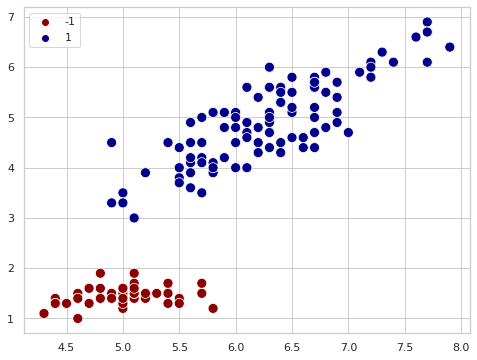

In [16]:
def todays_plot(): # learn to write your own
    sns.scatterplot(x1, x2,
      hue=y, # let's use different colors for the two classes
      palette=sns.color_palette(['darkred', 'darkblue']),
      s=100)

todays_plot()


The problem is clearly linearly separable. Let's see how the Perceptron performs

#### 3.7 **[4pt]** Implement the Perceptron Algorithm in a single cell (do not call any function defined above) as a function that takes the input vector and target labels and returns a trained hyperplane parametrization. Run it on the (partial) Iris data loaded above.

In [0]:
def perceptron(inp, tar):
  #init
  solved = False
  w = [0] * (len(inp[0])+1) #init with one more field for bias

  #better bias
  w[-1] = 1

  #prepare our data
  updated_inp = [ np.append(v, 1) for v in inp ] # append 1 at the end of every point

  #loop
  while solved == False:
    for x, y in zip(updated_inp, tar):
      solved = True
      c = y*np.dot(w, x)

      if(c <= 0):
        w = w + y*x
        solved = False
        break
  
  return (w[:-1], w[-1])

perceptron(x,y)

(array([-4. ,  9.3]), -1.0)

Ok we can plot the points and we can plot a $y = mx + q$ model. But how can we plot the $f(x) = \langle w, x \rangle + b$ decision boundary? Well we know the two classes are $f(x)>0$ (positive, above) and $f(x)<0$ (negative, below), so our boundary is in $f(x) = 0$.

$$
f(x) = \langle w, x \rangle + b = 0\\
w = \begin{bmatrix}w_1\\w_2\end{bmatrix}\\
ax + by + c = 0\\
y = mx + q\\[2ex]
a = w_1,\;\; b=w_2,\;\; c = b\\
w_1 x + w_2 y + b = 0\\
-w_2 y = w_1 x + b\\
y = \frac{w_1}{-w_2} x + \frac{b}{-w_2}\\[2ex]
m = \frac{w_1}{-w_2},\;\; q = \frac{b}{-w_2}\\
y = \frac{w_1}{-w_2} x + \frac{b}{-w_2}
$$

For now you can use the implementation below, but make sure you understand these simple (if tedious) steps above because next time you will need to implement it yourself.

In [0]:
def wb2mq(w, b):
    assert len(w) == 2, "This implementation only works in 2D"
    assert w[0] != 0 and w[1] != 0 and b != 0 # simplify
    return [w[0]/-w[1], b/-w[1]] # m and q

def params2boundary(w, b):
    m, q = wb2mq(w, b)
    print(f"m: {m}, q: {q}")
    return lambda x: m*x + q

Now we can plot the model on top of our data:

w: [-4.   9.3], b: -1.0
m: 0.4301075268817202, q: 0.1075268817204301


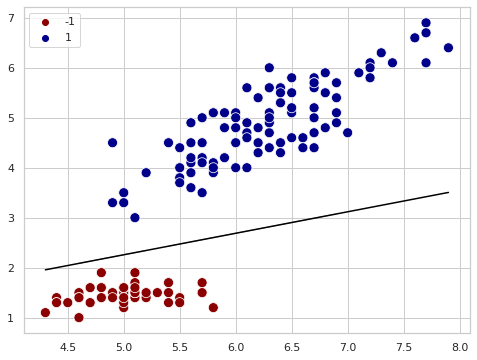

In [0]:
todays_plot()
perc_w, perc_b = perceptron(x, y)
# we can use the splat to separate the bias (last element)
print(f"w: {perc_w}, b: {perc_b}")
perc_boundary = params2boundary(perc_w, perc_b)
sns.lineplot(x1, [perc_boundary(inp) for inp in x1], color='black')


Let's do the same with the scikit-learn Perceptron and we are done.

In [0]:
from sklearn.linear_model import Perceptron

#### 3.8 **[1pt]** Train a scikit-learn Perceptron on the same data as last question.
Note: it should take no more than 2 lines

In [0]:
trained = Perceptron()
trained.fit(x,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

To visualize the mode, extract the vectors $w$ and $b$ from a trained scikit-learn Perceptron as `coef_` and `intercept_`. Note though they are both lists, to scale with multiclass classification (where you need multiple hyperplanes to partition the space in multiple regions), so be sure to access its first (only) element.

m: 0.423076923076923, q: 0.19230769230769226


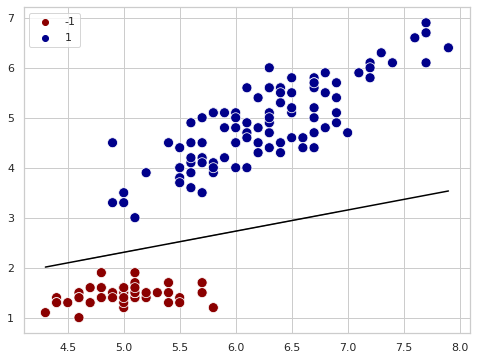

In [0]:
w, b = [trained.coef_[0], trained.intercept_[0]]
d_boundary = params2boundary(w, b)
todays_plot()
boundary_preds = [d_boundary(inp) for inp in x1]
sns.lineplot(x1, boundary_preds, color='black')

#### 3.9 **[1pt]** Compare the resulting boundary against the one trained with your hand-made algorithm (in English).

They look very similair, however my hand-made algorithm produces a boundary that is a bit too close to the red dot. It still divides the two sets clearly, though. The slope of mine seems also a tiny bit less than the one from sci-kit.
Update: I initialized the w vector with b=1, which produces a better result.
